In [88]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')

In [89]:
d_t = pd.read_csv('train.csv')

In [90]:
d_t

,Id,Location,Cases,Year,Deaths,Mortality,Total_Vaccinations,Vaccinated,Fully_Vaccinated
0,911530868,World,2372.0,2020,65.0,0.008,NaN,NaN,NaN
1,807936902,World,5023.0,2020,114.0,0.014,NaN,NaN,NaN
2,773590408,World,5612.0,2020,116.0,0.015,NaN,NaN,NaN
3,130466459,World,7580.0,2020,153.0,0.019,NaN,NaN,NaN
4,544040446,World,8983.0,2020,187.0,0.024,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
129151,541829605,Zimbabwe,464.0,2022,13.0,0.813,11949993.0,6297324.0,4601845.0
129152,969939474,Zimbabwe,471.0,2022,12.0,0.750,11958771.0,6299348.0,4605821.0
129153,667902340,Zimbabwe,450.0,2022,13.0,0.813,NaN,NaN,NaN
129154,961193720,Zimbabwe,277.0,2022,6.0,0.375,11974313.0,6305470.0,4611113.0


In [91]:
df = d_t.replace(np.nan, 0)

In [92]:
df

,Id,Location,Cases,Year,Deaths,Mortality,Total_Vaccinations,Vaccinated,Fully_Vaccinated
0,911530868,World,2372.0,2020,65.0,0.008,0.0,0.0,0.0
1,807936902,World,5023.0,2020,114.0,0.014,0.0,0.0,0.0
2,773590408,World,5612.0,2020,116.0,0.015,0.0,0.0,0.0
3,130466459,World,7580.0,2020,153.0,0.019,0.0,0.0,0.0
4,544040446,World,8983.0,2020,187.0,0.024,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
129151,541829605,Zimbabwe,464.0,2022,13.0,0.813,11949993.0,6297324.0,4601845.0
129152,969939474,Zimbabwe,471.0,2022,12.0,0.750,11958771.0,6299348.0,4605821.0
129153,667902340,Zimbabwe,450.0,2022,13.0,0.813,0.0,0.0,0.0
129154,961193720,Zimbabwe,277.0,2022,6.0,0.375,11974313.0,6305470.0,4611113.0


In [93]:
print(df.dtypes)

Id                      int64
Location               object
Cases                 float64
Year                    int64
Deaths                float64
Mortality             float64
Total_Vaccinations    float64
Vaccinated            float64
 Fully_Vaccinated     float64
dtype: object


In [94]:
cols_to_check = ['Vaccinated', ' Fully_Vaccinated', 'Total_Vaccinations']
rows_to_delete = df[df[cols_to_check].isin([0.0])].dropna(how='all').index
df = df.drop(rows_to_delete)


In [95]:
def map_numbers(x):
    if x <= 5.0:
        return 0
    elif x <= 10.0:
        return 1
    elif x <= 45:
        return 2
    elif x <= 50:
        return 3
    elif x <= 65:
        return 4

    else:
        return -1

# apply the mapping function to the 'numbers' column
df['Mortality'] = df['Mortality'].apply(map_numbers)



In [96]:
#df.tail(60)

In [97]:
x = df[['Cases','Deaths','Total_Vaccinations','Vaccinated',' Fully_Vaccinated']]
x.shape
x

,Cases,Deaths,Total_Vaccinations,Vaccinated,Fully_Vaccinated
231,4401227.0,78095.0,35647.0,29152.0,7425.0
232,4417781.0,78496.0,40330.0,33668.0,7565.0
233,4487887.0,80910.0,1779065.0,266515.0,8318.0
234,4554209.0,81609.0,2057367.0,538177.0,9091.0
235,4555265.0,81866.0,2664507.0,1132176.0,11428.0
...,...,...,...,...,...
129149,554.0,15.0,11945534.0,6296280.0,4599476.0
129151,464.0,13.0,11949993.0,6297324.0,4601845.0
129152,471.0,12.0,11958771.0,6299348.0,4605821.0
129154,277.0,6.0,11974313.0,6305470.0,4611113.0


In [98]:
y = df[['Mortality']]
y.shape

(35220, 1)

In [99]:
def round_decimal(x):
    decimal_part = x - int(x)
    if decimal_part > 0.5:
        return int(x) + 1
    else:
        return int(x)

# apply the lambda function to the 'my_column' column
y['Mortality'] = y['Mortality'].apply(lambda x: round_decimal(x))

In [100]:
x_a=np.array(x)
y_b=np.array(y)

y_b.shape

(35220, 1)

In [101]:
from sklearn.preprocessing import StandardScaler
s_c=StandardScaler()
sc_x =s_c.fit_transform(x_a)

In [102]:
sc_x.shape

(35220, 5)

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sc_x,y_b, test_size = 0.2, random_state=42)

In [104]:
# y_test = np.squeeze(y_test)
#_test.shape
#_test.shape


In [105]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.cluster import KMeans  
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import SGDRegressor

In [106]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier()
forest.fit(x_train,y_train)



RandomForestClassifier()

In [107]:
# print(automl.best_config)
# print(automl.best_estimator)

In [108]:
y_pred = forest.predict(x)
from sklearn.metrics import r2_score

score = r2_score(y, y_pred)
print("R2 Score:", score)

R2 Score: -0.6561730166497339


In [109]:
y_pred = forest.predict(x_test)
# y_pred = np.argmax(y_pred,axis=1)
y_pred

array([1, 0, 0, ..., 3, 0, 0], dtype=int64)

In [110]:
from sklearn.metrics import accuracy_score,classification_report
print("TRAIN  accuracy_score:", forest.score(x_train,y_train)*100)

# y_pred = forest.predict(x_train)
# print(y_pred.shape, y_pred.dtype)
# train_accuracy = accuracy_score(y_train,y_pred)
# print("TRAIN accuracy_score:", train_accuracy*100)

TRAIN  accuracy_score: 100.0


In [111]:
#y_pred.shape
#y_test.shape

In [112]:

print("TEST accuracy_score:", accuracy_score(y_pred,y_test)*100)


TEST accuracy_score: 94.534355479841


In [113]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_pred,y_test)
print(cf_matrix)

[[ 294    0    2   11    1   14]
 [   1 3009   54   27    0    1]
 [   1   35  935   23    1    0]
 [  13   27   66 2179   36   23]
 [   1    0    0   10   65    8]
 [  15    0    2    5    8  177]]


In [114]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          -1       0.90      0.91      0.91       322
           0       0.98      0.97      0.98      3092
           1       0.88      0.94      0.91       995
           2       0.97      0.93      0.95      2344
           3       0.59      0.77      0.67        84
           4       0.79      0.86      0.82       207

    accuracy                           0.95      7044
   macro avg       0.85      0.90      0.87      7044
weighted avg       0.95      0.95      0.95      7044



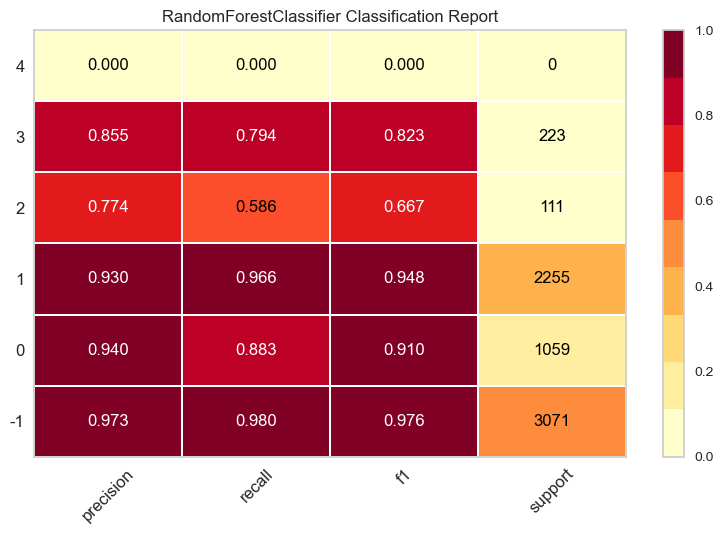

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [115]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(forest,support=True)
visualizer.fit(x_train, y_train) 
visualizer.score(x_test, y_test) 
visualizer.show() 

Text(0.5, 1.0, 'confusion_matrix')

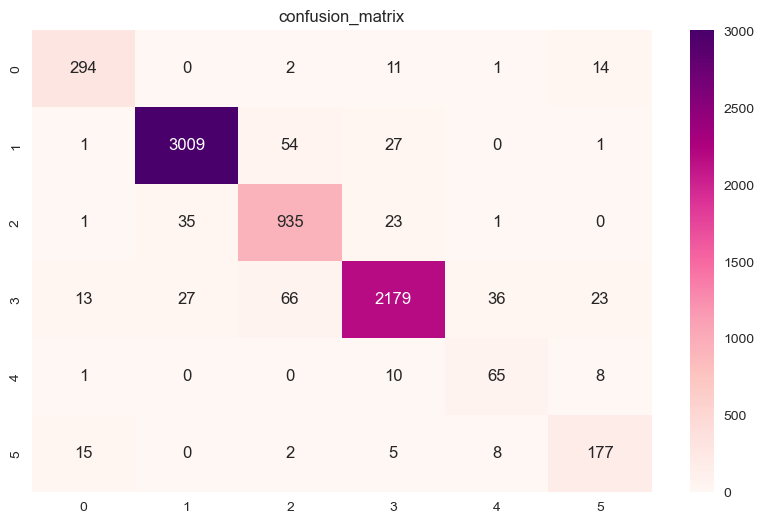

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 6.0)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_pred, y_test)
sns.heatmap(cfm, cmap='RdPu', annot=True, fmt='.0f')
plt.title('confusion_matrix')

Text(0.5, 1.0, 'y_pred')

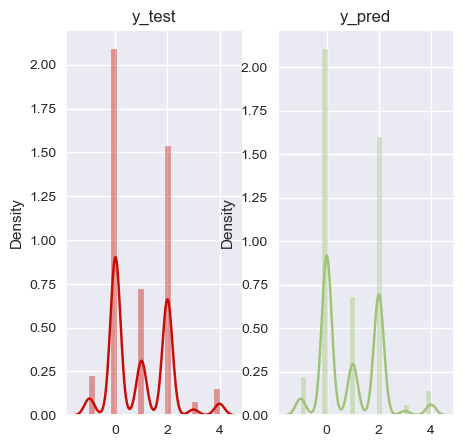

In [117]:
sns.set_style("darkgrid")
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
sns.distplot(y_test,color='r')
plt.title('y_test')

sns.set_style("darkgrid")
plt.subplot(1,2,2)
sns.distplot(y_pred,color='g')
plt.title('y_pred')

Text(0.5, 1.0, 'x_test')

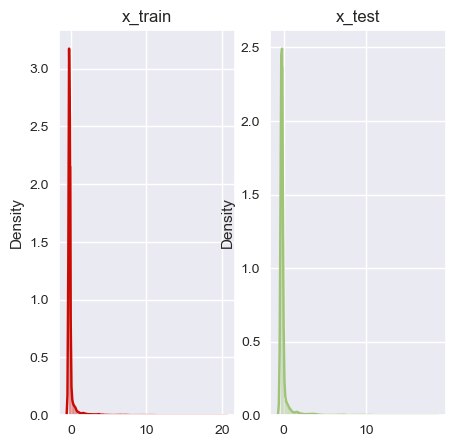

In [118]:
sns.set_style("darkgrid")
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
sns.distplot(x_train,color='r')
plt.title('x_train')

sns.set_style("darkgrid")
plt.subplot(1,2,2)
sns.distplot(x_test,color='g')
plt.title('x_test')

In [119]:
import pickle
pickle.dump(forest, open("code.pkl","wb"))
pickle.load(open("code.pkl", "rb"))


RandomForestClassifier()

In [120]:
# from joblib import dump
# dump(forest, filename="deploye.joblib")

In [121]:
# from joblib import load
# forest = load("deploye.joblib")